## Console Analyses

Este notebook tem o intuito de analisar os dados das séries temporais de vendas de todos os consoles de 2004 até 2025. Todo o conteúdo aboradado até o momento aqui se baseia na decomposição vetorial da serie em partes sazionais, tendências e resíduos.

### Começando

As próximas células são simples, uma de imports do python, ou seja, as bibliotecas usadas para fazer os cálculos necessários, e a outra a criação dos objetos de manipulação das séries temporais.
Além disso, é colocado uma breve vizualização de todas as séries de cada console coexistindo. Veja abaixo:

In [1]:
import pandas as pd #dataframes
import matplotlib.pyplot as plt #plot
import seaborn as sns #estilo
import numpy as np #manipulação de vetores
from datetime import datetime #TAD dados temporais
import scipy.stats #biblioteca para estatísticas básicas
from statsmodels.tsa.seasonal import STL #decomposição da série

In [2]:
df_games = pd.read_csv('../data/games.csv',parse_dates=['week'])
df_games['week'] = pd.to_datetime(df_games['week'])
df_games = df_games.set_index("week")
df_games

,name,console
week,,
2017-04-28,Mario Kart 8 Deluxe,NS
2020-03-20,Animal Crossing: New Horizons,NS
2018-12-07,Super Smash Bros. Ultimate,NS
2017-03-03,The Legend of Zelda: Breath of the Wild,NS
2017-10-27,Super Mario Odyssey,NS
...,...,...
2012-09-25,LittleBigPlanet PS Vita,PSV
2012-10-30,Need for Speed: Most Wanted (2012),PSV
2013-09-10,Killzone: Mercenary,PSV


In [13]:
df_global_consoles = pd.read_csv('../data/Global/Global_console_weekly_sales.csv',parse_dates=['week']) 
df_global_consoles['week'] = pd.to_datetime(df_global_consoles['week'])

df_na_consoles = pd.read_csv('../data/NA/NA_console_weekly_sales.csv',parse_dates=['week']) 
df_na_consoles['week'] = pd.to_datetime(df_na_consoles['week'])

df_eu_consoles = pd.read_csv('../data/EU/EU_console_weekly_sales.csv',parse_dates=['week']) 
df_eu_consoles['week'] = pd.to_datetime(df_eu_consoles['week'])

df_JAPAN_consoles = pd.read_csv('../data/Japan/Japan_console_weekly_sales.csv',parse_dates=['week']) 
df_JAPAN_consoles['week'] = pd.to_datetime(df_JAPAN_consoles['week'])


consoles = ['PS5', 'WiiU', 'XS', 'NS', 'PSV', 'PSP', 'XOne', 'PS4', '3DS', 'DS', 'Wii', 'PS3', 'X360']
colors = ['#003087', '#009AC7', '#107C10', '#e60012', '#d70051', '#cc0066', '#52b043', '#00439c', '#ce181e', '#ff7f00', '#009ac7', '#003399', '#52b043']

In [ ]:
def plot_all(df,colors,consoles):
    plt.figure(figsize=(16, 10))

    for console, color in zip(consoles, colors):
        console_data = df[df['console'] == console]

        plt.plot(console_data['week'], console_data['sales'],
                label=console, color=color, alpha=0.7, linewidth=2)

    plt.title('Vendas Semanais de Consoles (2004-2025)', fontsize=18)
    plt.xlabel('Ano', fontsize=14)
    plt.ylabel('Vendas Semanais', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10)

    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    plt.xticks(rotation=45)

    plt.tight_layout()

    plt.show()

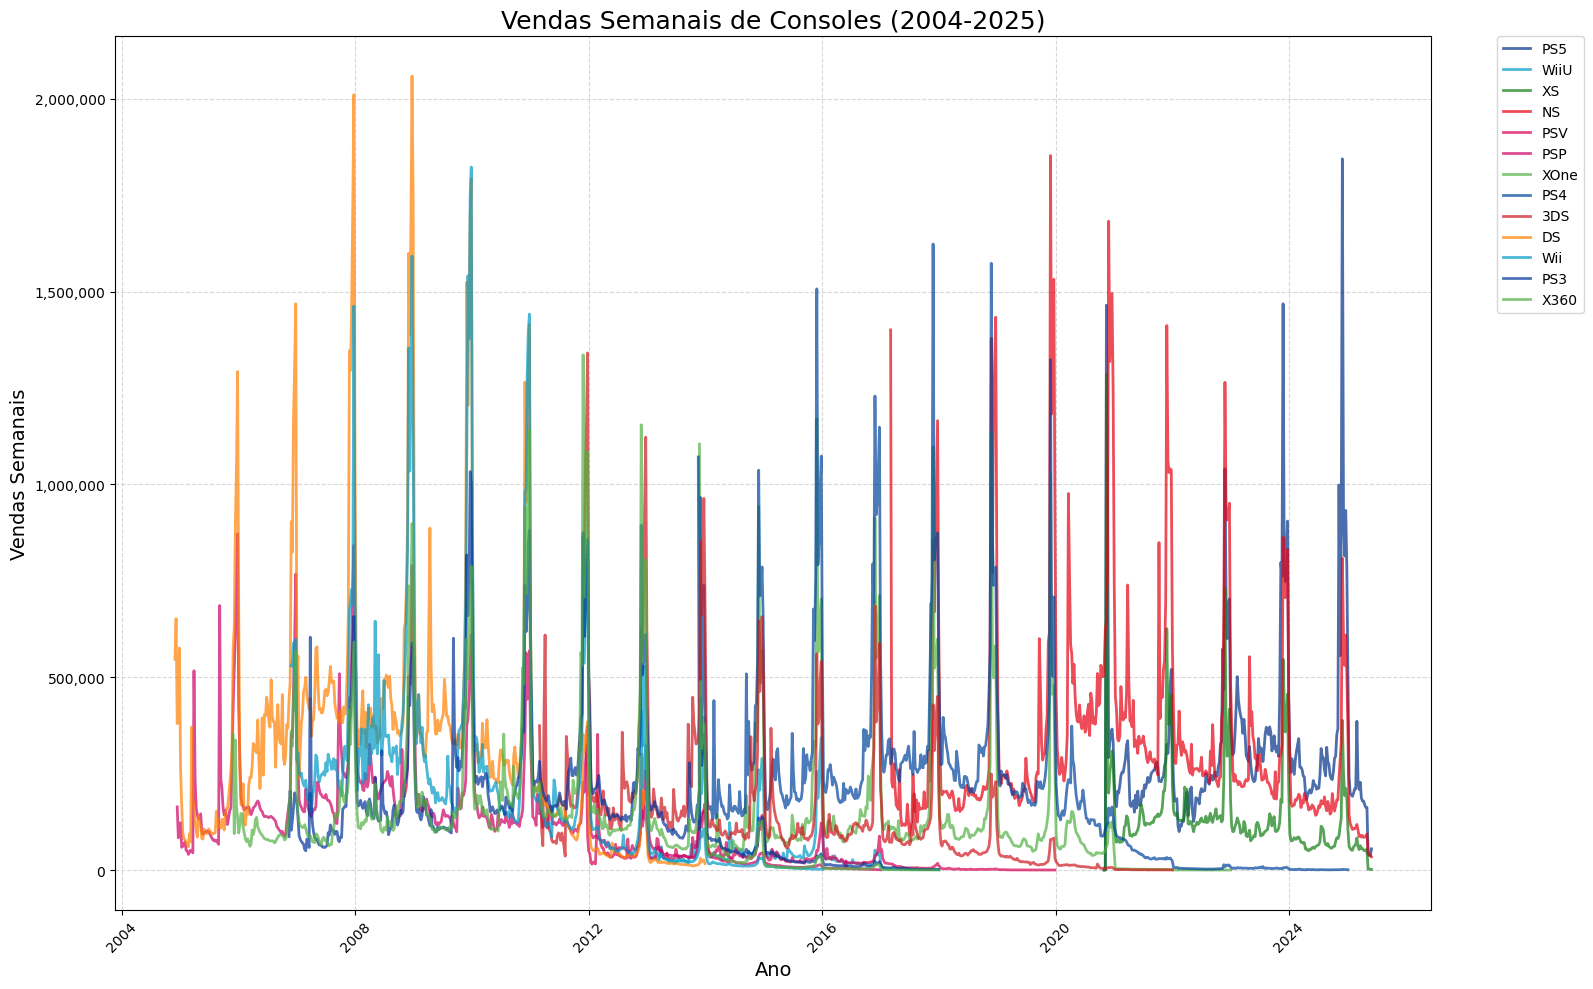

In [14]:
plot_all(df_global_consoles,colors,consoles)

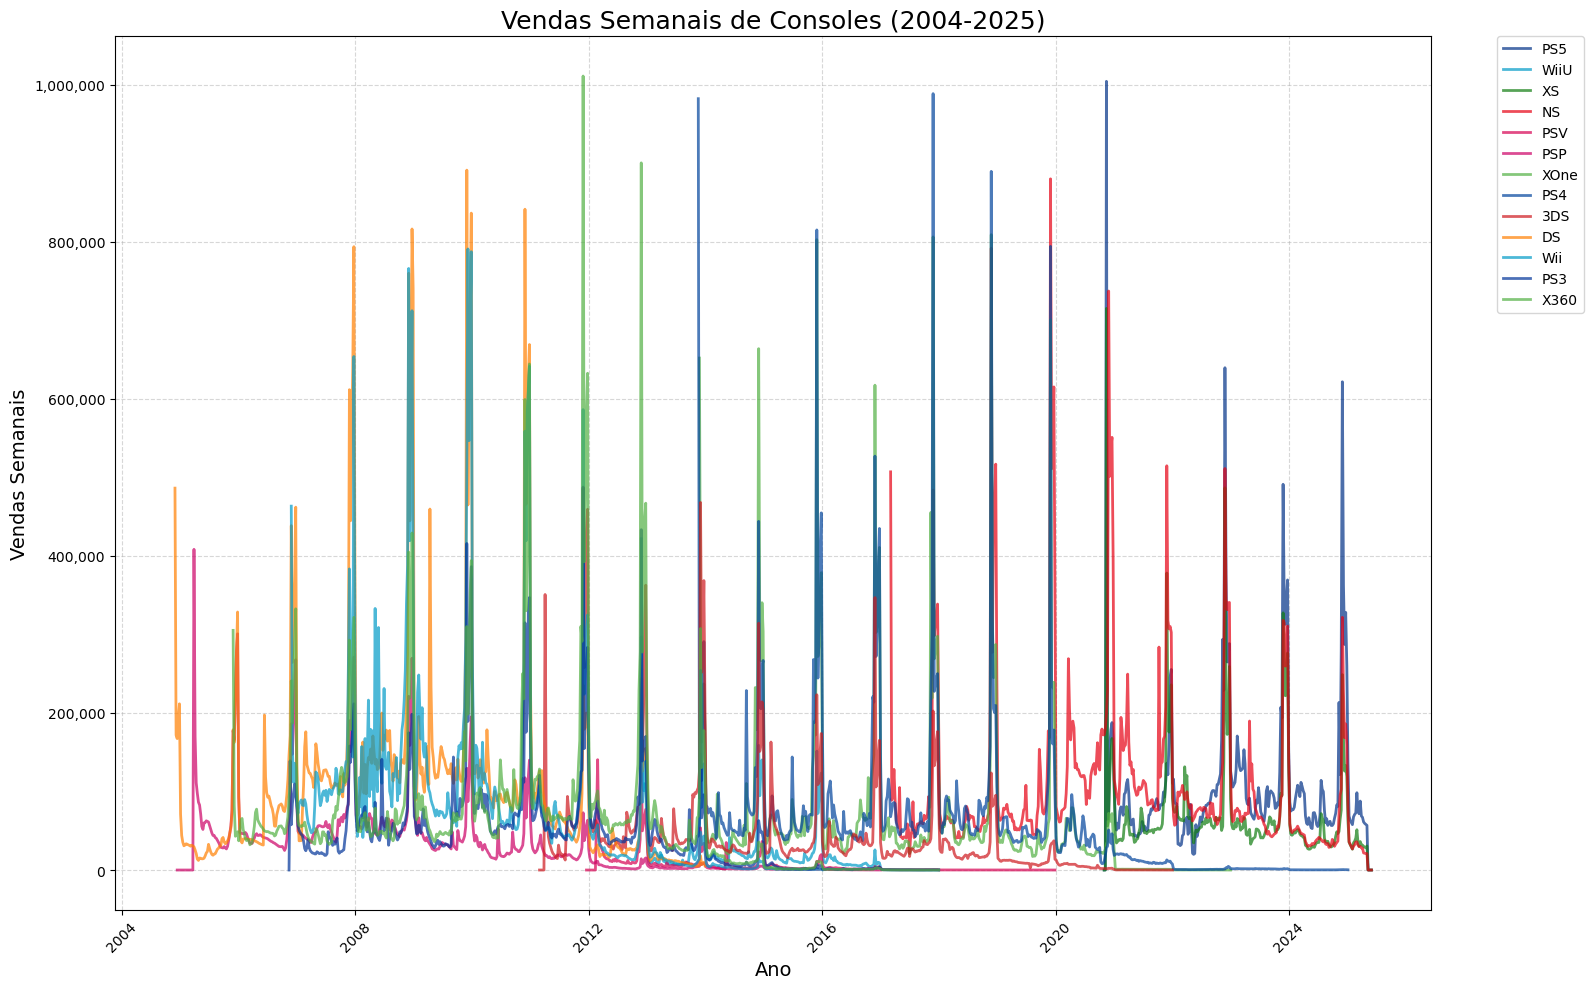

In [10]:
plot_all(df_na_consoles,colors,consoles)

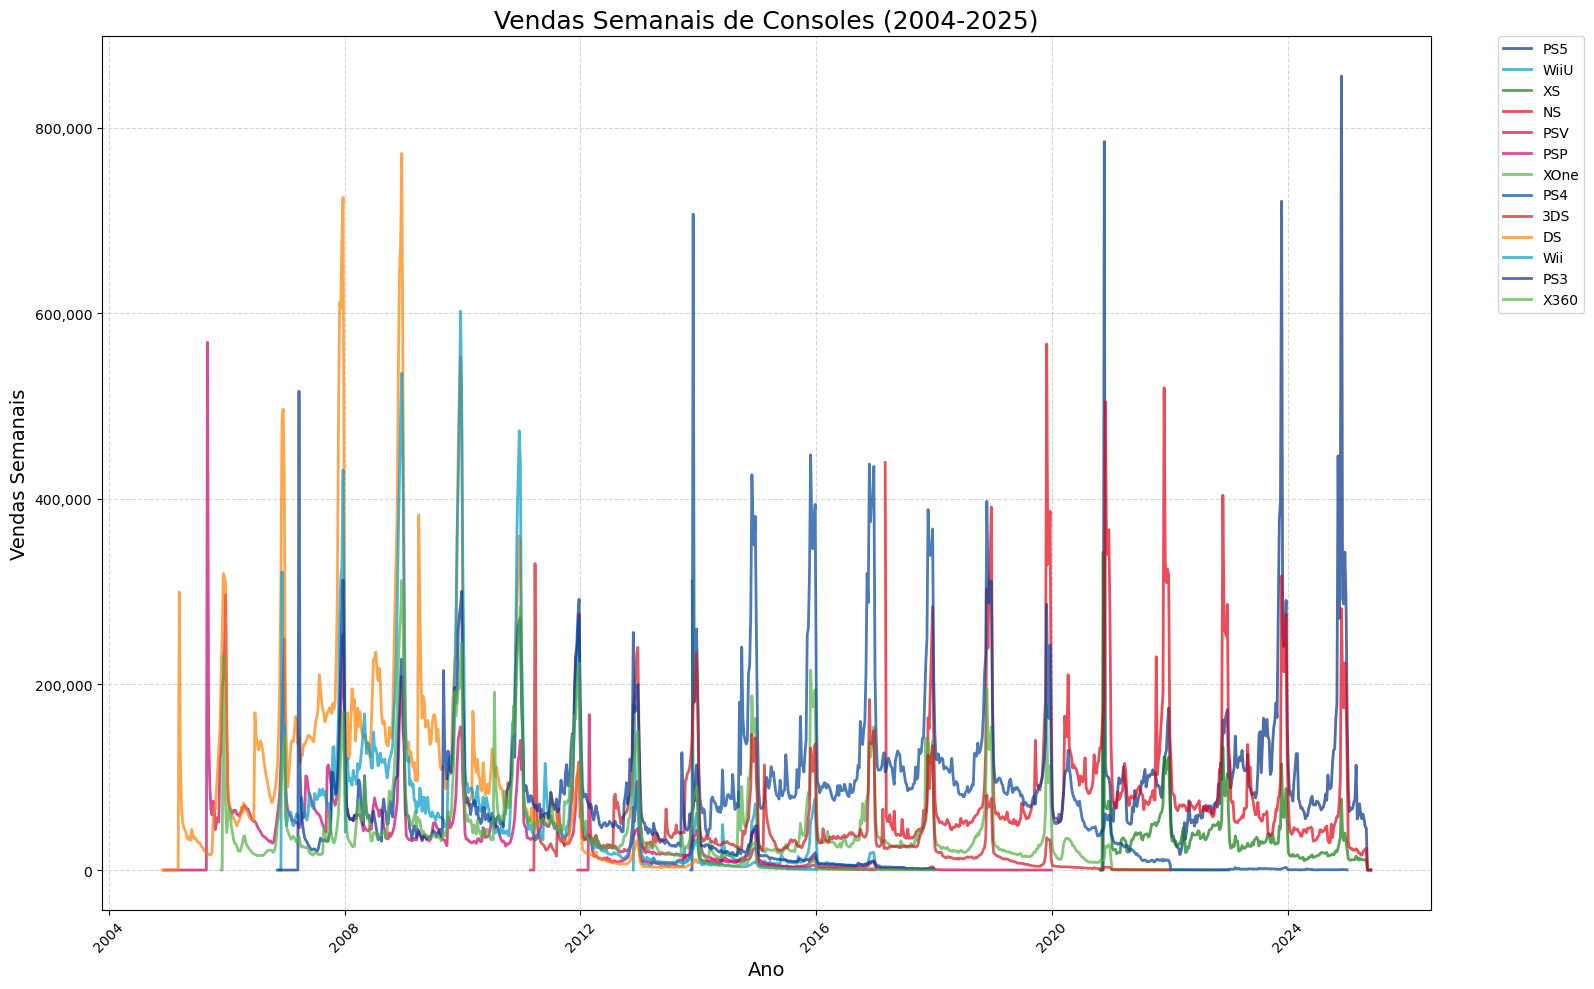

In [11]:
plot_all(df_eu_consoles,colors,consoles)

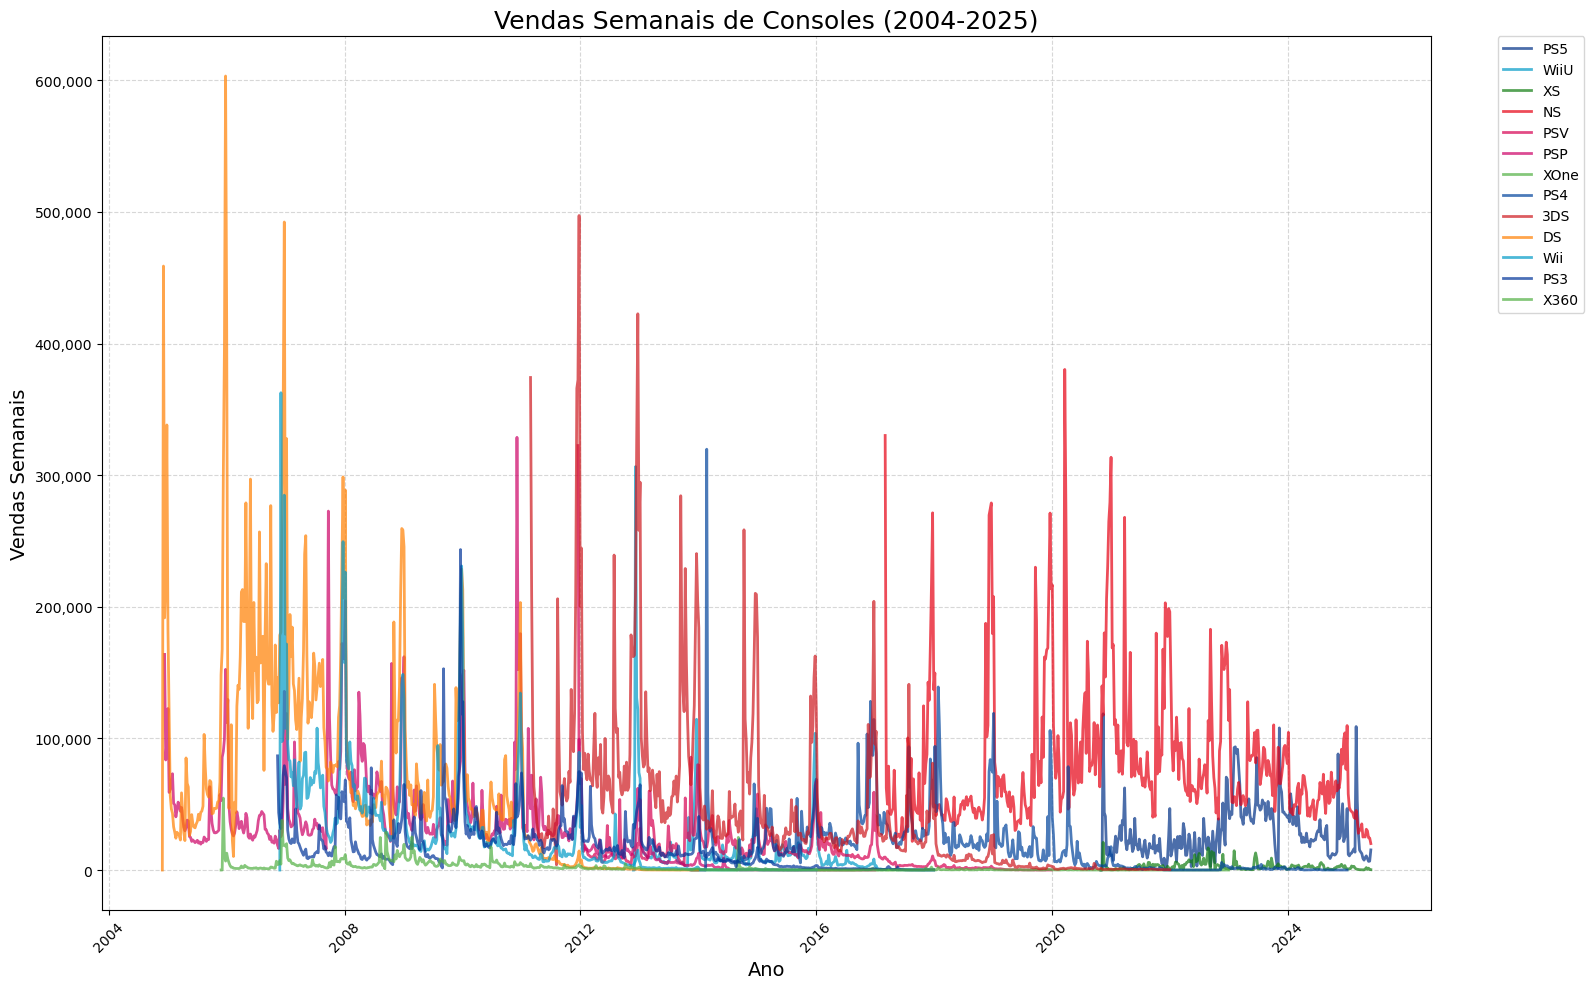

In [12]:
plot_all(df_JAPAN_consoles,colors,consoles)

### Tall-Thin Matriz

Para facilitar as operações, separa os vetores antes condeçados, a forma que conseguimos extrair eles, para uma matriz onde cada coluna é um vetor. A ideia é de expandir isso posteriormente, assim verificando qual console se relaciona mais com qual, correlações, e outras propriedades vetorias entre console. Sendo assim, se cria uma matriz $M=n+x+p...$, como:

In [16]:
def tall_thin(df,folder,name):
    consoles = ['PS5', 'XS', 'NS', 'PSV', 'XOne', 'PS4', 'WiiU','3DS', 'PS3', 'X360', 'Wii', 'PSP']
    consoles.reverse()
    last_console = df[df['console'] == 'DS'].set_index("week").rename(columns={"sales" : 'DS'}).get(['DS'])
    for console in consoles:
        console_data = df[df['console'] == console].set_index("week").rename(columns={"sales" : console}).get([console])
        last_console = pd.concat([last_console,console_data], axis=1).fillna(0)
        
    last_console.to_csv(f'../data/{folder}/{name}_console_matrix.csv',index=True)
    return last_console
tall_thin(df_global_consoles,"Global","global")

,DS,PSP,Wii,X360,PS3,3DS,WiiU,PS4,XOne,PSV,NS,XS,PS5
week,,,,,,,,,,,,,
2004-11-27,546507.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-12-04,651898.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-12-11,379673.0,163812.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-12-18,441085.0,83598.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-12-25,575947.0,98771.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93525.0,54766.0,162419.0
2025-05-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45552.0,1909.0,41092.0
2025-05-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39874.0,2744.0,38345.0


### Análise de Série Temporal
Por fim, chegamos na parte principal, a de análises das séries tempo. Inicialmente, fazemos uma limpeza dos dados, afim de obter uma função simples que retire os zeros dos nossos vetores para que não tenhamos que considerar em nível de programação todos os anos existentes, tal como:

In [6]:
consoles = ['PS5', 'WiiU', 'XS', 'NS', 'PSV', 'PSP', 'XOne', 'PS4', '3DS', 'DS', 'Wii', 'PS3', 'X360']

#### Seasonal and Trend with LOESS (STL)

Apartir desse momento acontece a análise de fato. Esta é pautada em 7 gráficos que nos revelam o comportamento da série temporal, gerando insights que podem ser posteriormente análisados para verificação de outros resultados e melhores estatégias de negócios.
Inicialmente, após selecionar cada uma dos vetores que representam a séries temporal, se é organizado o método *STL*, o qual se trata de uma aproximação da série por meio de uma decomposição linear, que siga por sua vez $V(t) = T(t) + S(t) + R(t)$.
O método STL decompoe um vetor $V$ qualquer em 3 partes: A variação de tendência ao longo do tempo, a sazionalidade (isto é, os picos existentes) e os resíduos(valores estranho que tendem a um modelo desconhecido). Para o cálculo, se utiliza de uma regressão não-linear e não-paramétrica chamada LOESS, a qual calcula cada um de seus $x_i$ em um ambito de da seguinte função:

    Para os pesos de na regressão
$$
W(u) = \begin{pmatrix} (1 - u^3)^3 \\ 0 \end{pmatrix} \quad \text{se } 0 \leqslant u < 1, \quad \text{e } \mathbf{0} \text{ caso contrário.}
$$ 

    Para os valores esperados

$$
v_i(x) = W\left(\frac{|x_i - x|}{\lambda_g(x)}\right)
$$


Assim se coloca os valores esperados em cada momento, restando então decompor isto nas três partes, que seguem pelo processo iterativo, começando com a tendência $T(t)^0$ em um valor arbitrário (que se converge conforme a função de erro da regressão), e a sazionalidade $S(t)^0$ em 0. Indo assim iterativamente:
$$
\begin{aligned}
T_t^{(k)} &= \text{LOESS}\left(Y_t - S_t^{(k-1)}\right) \\
S_t^{(k)} &= \text{LOESS}\left(\text{Médias sazonais de } Y_t - T_t^{(k)}\right)
\end{aligned}
$$

Já os resíduos é $R(t) = V(t) - T(t)- S(t)$.

Por fim, para verificar a qualidade dos dados previstos, pode aproximar pela métrica $R$, tal que R é dado por $$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$


#### Interpretação dos Componentes Decompostos

O próximo passo então e entender como isto tudo se correlaciona com o mercado e vendas de consoles, para isso dispõe dos tópicos:

##### 1. Tendência (Tₜ)
- **O que representa**:  
    A evolução de **longo prazo** das vendas, indicando períodos de crescimento sustentado ou declínio.

- **Insights estratégicos**:
  - Identifica **picos de demanda** (ex.: lançamento de novo console)
  - Revela **ciclos de vida do produto**:
    - Fase de lançamento
    - Maturidade do mercado
    - Saturação/Declínio
  - Auxilia no planejamento de:
    - Campanhas de marketing
    - Produção e estoque
    - Precificação dinâmica

##### 2. Sazonalidade (Sₜ)
- **O que representa**:  
    Os picos e declínios das vendas **ao longo de um ano**, ou seja, sazional.

- **Padrões identificados**:
    - Identifica as **demandas sazionais**
    - Importante para planejamento dos anos fiscais e estratégias para vendas
    - Nos gráficos abaixo observamos que há picos durante a época de final de Ano, ou seja:
        - Black Friday
        - Natal

##### 3. Resíduos(Rₜ)
- **O que representa**:
    Variações de vendas não previstas pelo modelo de tendência e sazionalidade

- **Padrões identificados**:
    - É possível observar flutuações nas vendas de maneira adversa. Com investigações mais profundas é possível notar um modelo nas variações, algo que aqui não será feito.
    - Tendo a ideia de normalidade aplica a estes resíduos, é possível fazer testes de hipósteses para verificar anomalias nas vendas, como será feito a seguir. 


#### Anomalias e suas observações
Procuramos obseravar nas séries um fator muito importante que é a presença de anomalias nas vendas, sejam abaixo do esperado ou muito acima, dessa maneira somos capazes de posteriormente observar relações disso com cenários econômicos, bem como o impacto de jogos nas vendas de cada console. Para isto, antes de tudo, foi realizado um teste de normalidade para verificação da presença dos resíduos anomalos, ou seja, uma maneira de sabermos qual análise de anomalias se encaixaria melhor para o caso. Para isso foi realizado o teste de Shapiro-Wilk, que tendo os n-vetores que representam os consoles, do qual partir de de coeficientes específicos do teste, compara os valores sobre o mínimo quadrado do vetor, obtendo uma  estatística $W$ sobre a qual é observado um p-valor em uma Z-normal sendo a fórmula:
${\displaystyle W={\left(\sum _{i=1}^{n}a_{i}x_{(i)}\right)^{2} \over \sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}},}$

In [ ]:
def shapiro_wilk(df,folder,name,consoles,with_graph=False):
    df = tall_thin(df,folder,name)
    for console in consoles:
        current_series = df[console].dropna()
        current_series = current_series[current_series != 0]

        np.random.seed(42)
        
        if(with_graph):
            plt.figure(figsize=(10, 6))
            sns.histplot(current_series, kde=True, bins=30, color='skyblue')
            plt.title(f'Histograma dos Valores - {console}')
            plt.xlabel('Valor')
            plt.ylabel('Frequência')
            plt.grid(axis='y', alpha=0.75)
            plt.show()

        stat_shapiro, p_shapiro = scipy.stats.shapiro(current_series.values)  
        print(f"--- Teste de Shapiro-Wilk de {name} ---")
        print(f"Estatística de Teste (W): {stat_shapiro}")
        print(f"P-valor: {p_shapiro}")

        alpha = 0.05
        if p_shapiro > alpha:
            print(f"Conclusão: O p-valor ({p_shapiro}) > {alpha}, portanto, NÃO REJEITAMOS a H0 para o console: {console}.")
            print("Há evidências para sugerir que os resíduos são normalmente distribuídos (ou não há evidência suficiente para rejeitar a normalidade).")
        else:
            print(f"Conclusão: O p-valor ({p_shapiro}) <= {alpha}, portanto, REJEITAMOS a H0 para o console: {console}.")
            print("Há evidências para sugerir que os resíduos NÃO são normalmente distribuídos.")
        print("-" * 30)
        
shapiro_wilk(df_global_consoles,"Global","global",consoles)

--- Teste de Shapiro-Wilk de global ---
Estatística de Teste (W): 0.6532477451588321
P-valor: 9.38591932510223e-22
Conclusão: O p-valor (9.38591932510223e-22) <= 0.05, portanto, REJEITAMOS a H0 para o console: PS5.
Há evidências para sugerir que os resíduos NÃO são normalmente distribuídos.
------------------------------
--- Teste de Shapiro-Wilk de global ---
Estatística de Teste (W): 0.5572537839704155
P-valor: 1.659831110597809e-25
Conclusão: O p-valor (1.659831110597809e-25) <= 0.05, portanto, REJEITAMOS a H0 para o console: WiiU.
Há evidências para sugerir que os resíduos NÃO são normalmente distribuídos.
------------------------------
--- Teste de Shapiro-Wilk de global ---
Estatística de Teste (W): 0.5853755767848461
P-valor: 1.5959976488800398e-23
Conclusão: O p-valor (1.5959976488800398e-23) <= 0.05, portanto, REJEITAMOS a H0 para o console: XS.
Há evidências para sugerir que os resíduos NÃO são normalmente distribuídos.
------------------------------
--- Teste de Shapiro-Wilk

### Gráficos
Finalizando, agora segue os gráficos para nos mostrar os resultados. Antes da análise, fazemos os testes de modo que procuramos observar normalidade, para então observar os resíduos necessários. Primeiro vem a métrica de $R^2$, se $R^2 > 0.8$ (convenção, tal qual $\alpha = 5%$), consideramos a aproximação boa. Depois segue os gráficos da curva real e a curva estimada pelo modelo só de tendência e sazionalidade. Após isso, vem a de resíduos, identificando o intervalo de confiaça já calculado, onde os resultados fora serão considerados anomalos, os quais são marcados em outro gráfico, podendo ver que são as maiores variações em relação ao modelo padrão. Por fim, as cruvas de tendência e sazionalidade.

Teste de R2 (Erro quadratico Séries): 1.0
Conclusão: Aproximação Boa


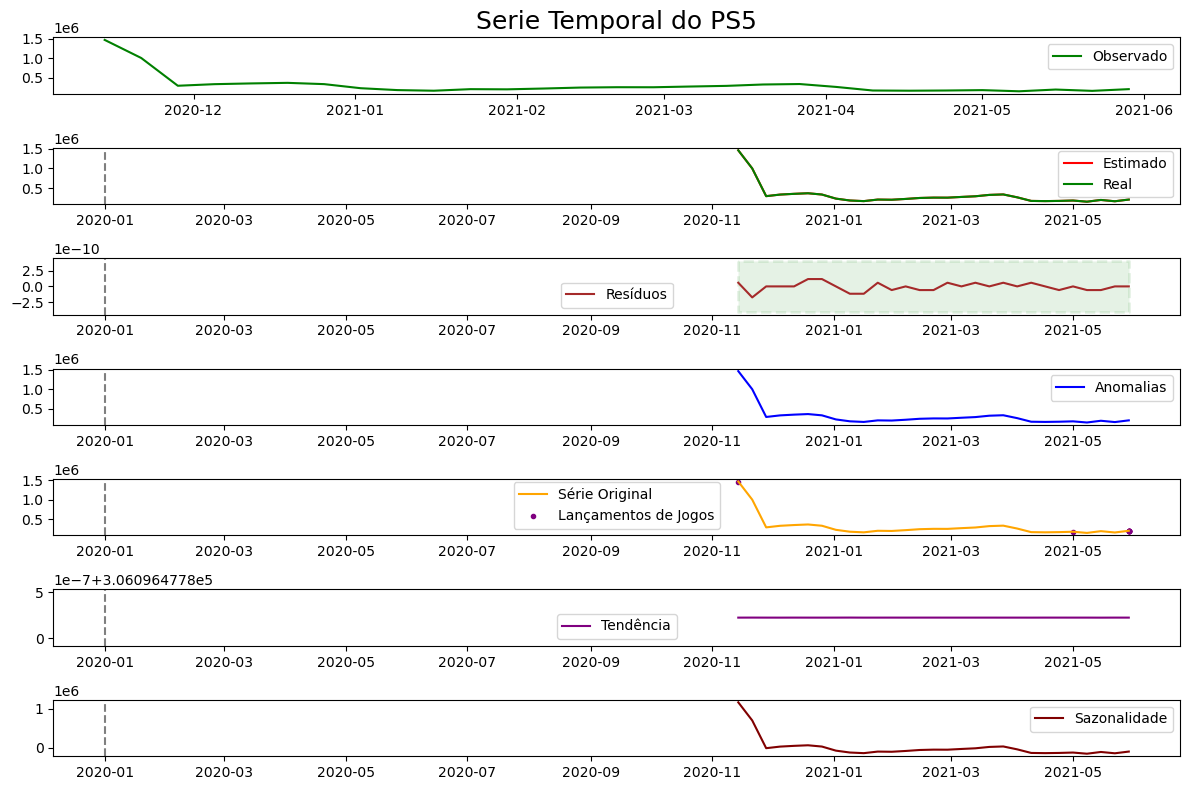

Teste de R2 (Erro quadratico Séries): 0.9289100149362038
Conclusão: Aproximação Boa


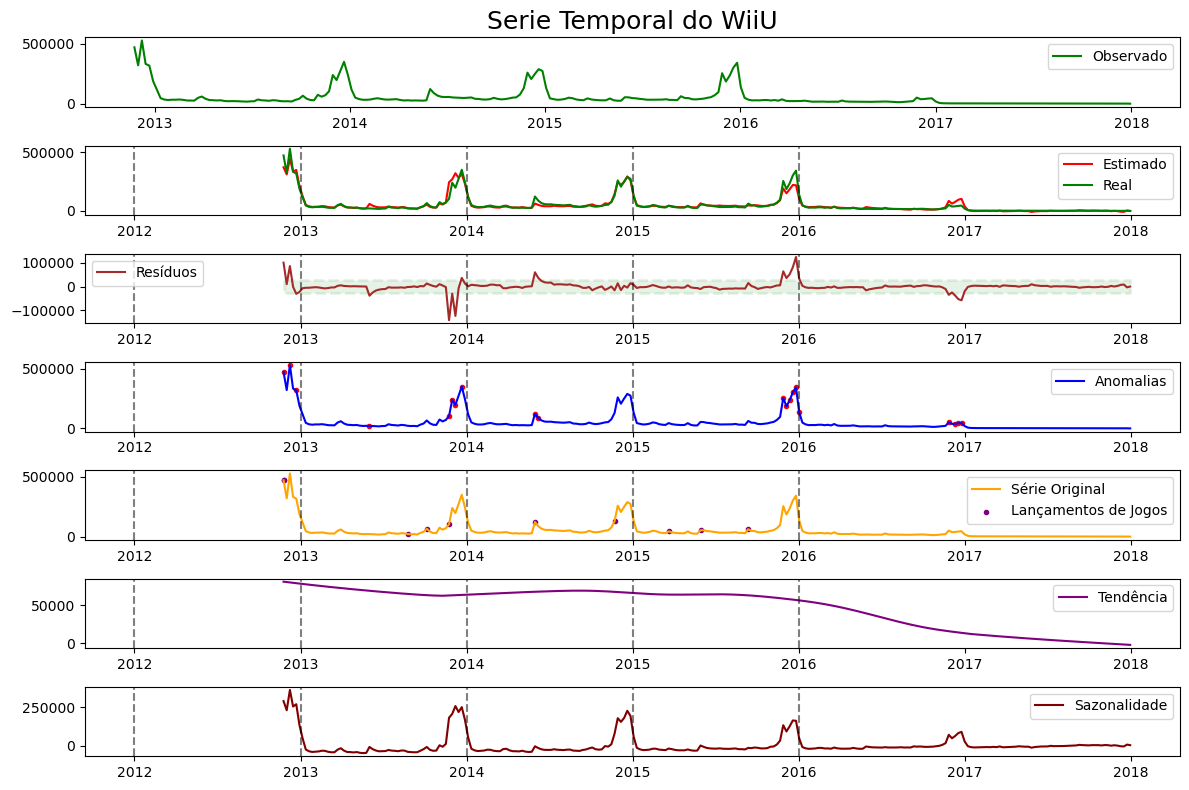

Teste de R2 (Erro quadratico Séries): 0.8584414206710985
Conclusão: Aproximação Boa


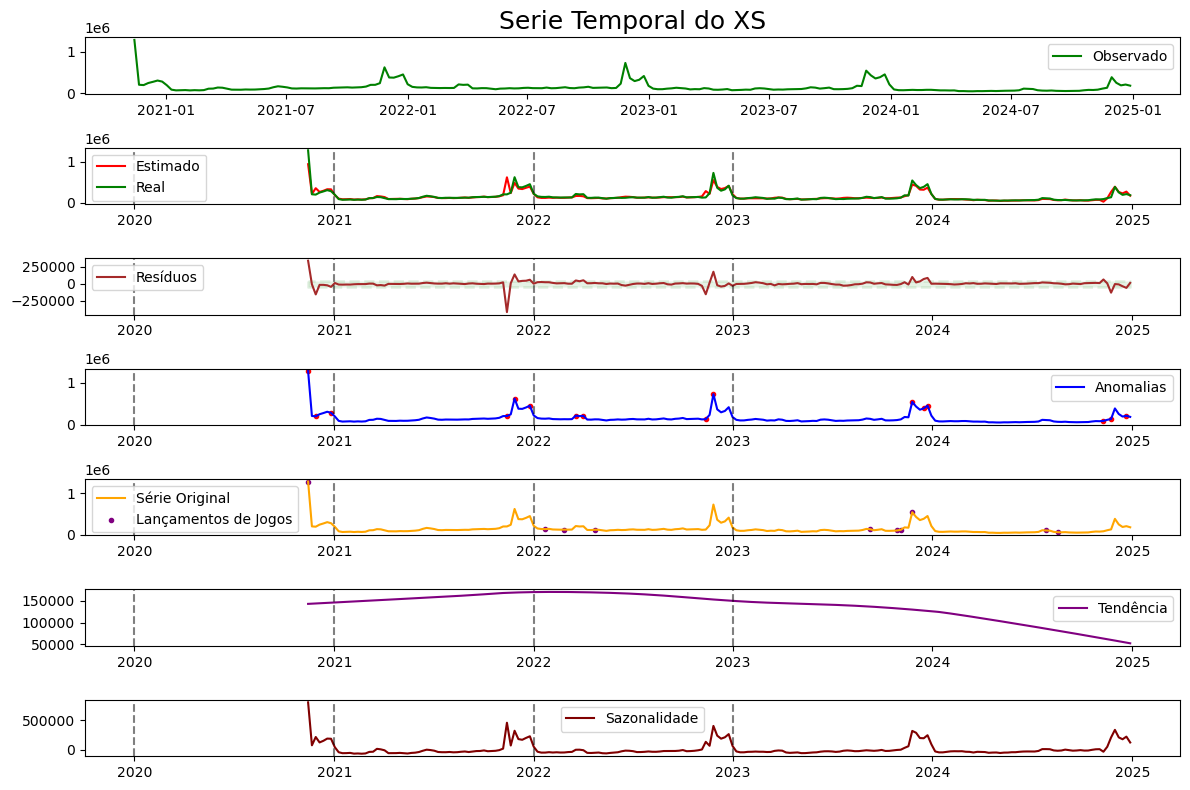

Teste de R2 (Erro quadratico Séries): 0.926430211649431
Conclusão: Aproximação Boa


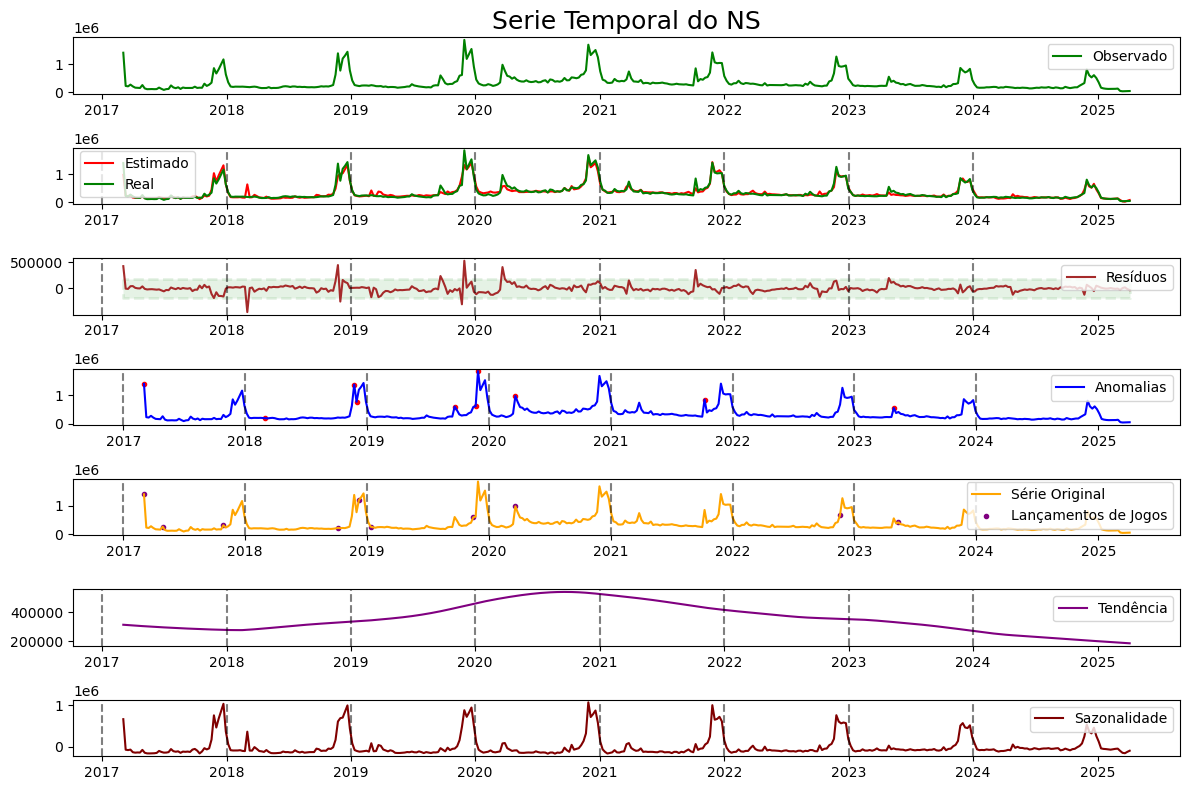

Teste de R2 (Erro quadratico Séries): 0.8869195827579259
Conclusão: Aproximação Boa


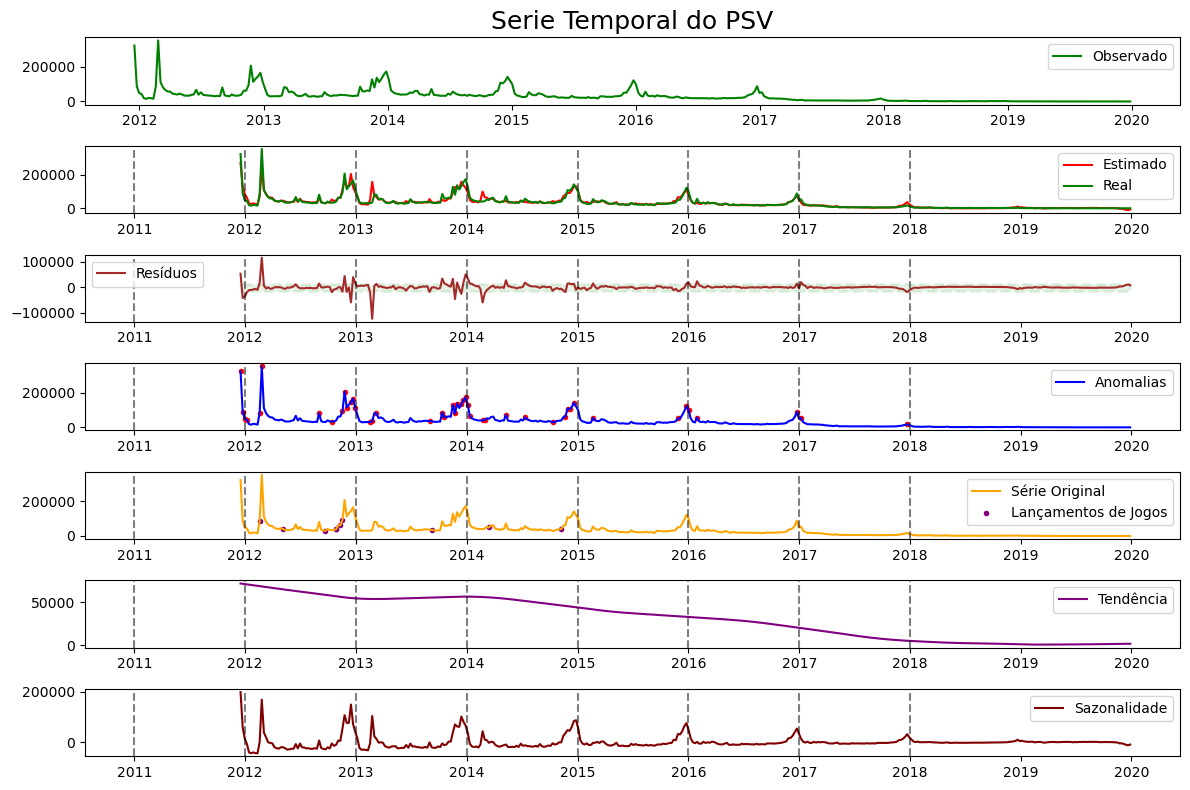

Teste de R2 (Erro quadratico Séries): 0.9204975069207201
Conclusão: Aproximação Boa


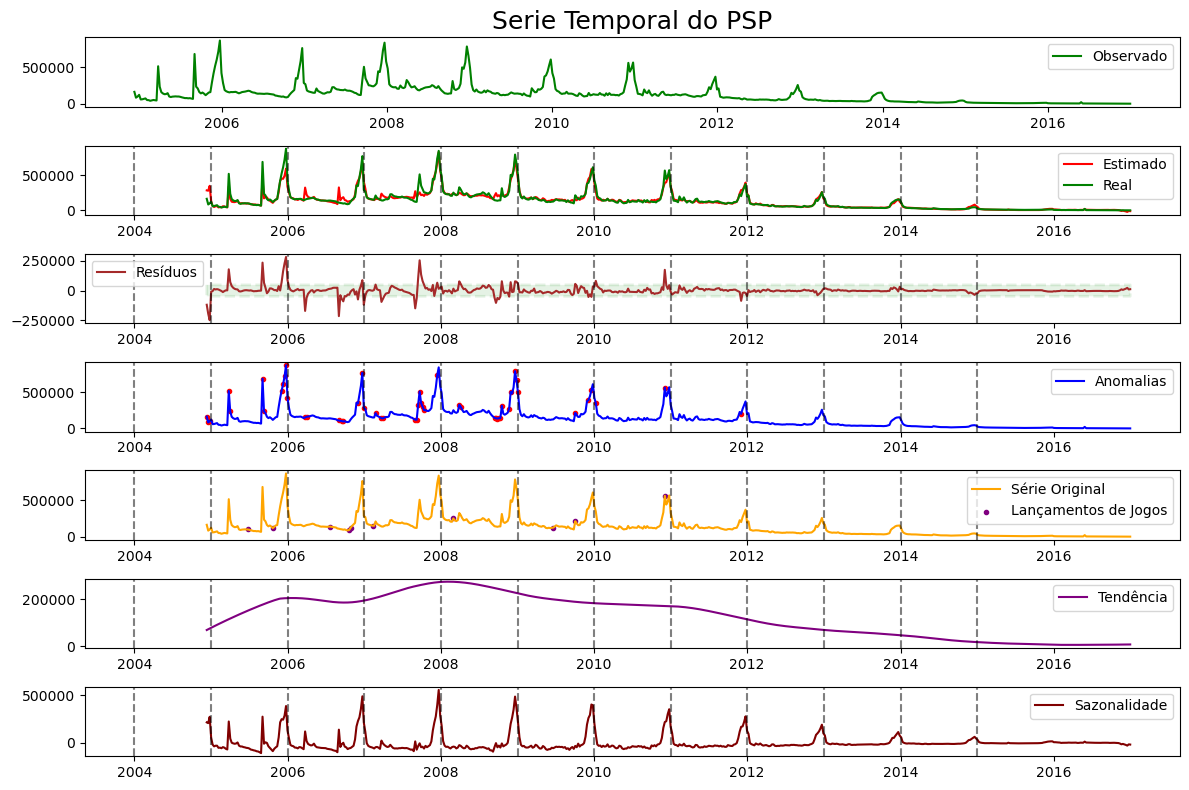

Teste de R2 (Erro quadratico Séries): 0.9144758846871105
Conclusão: Aproximação Boa


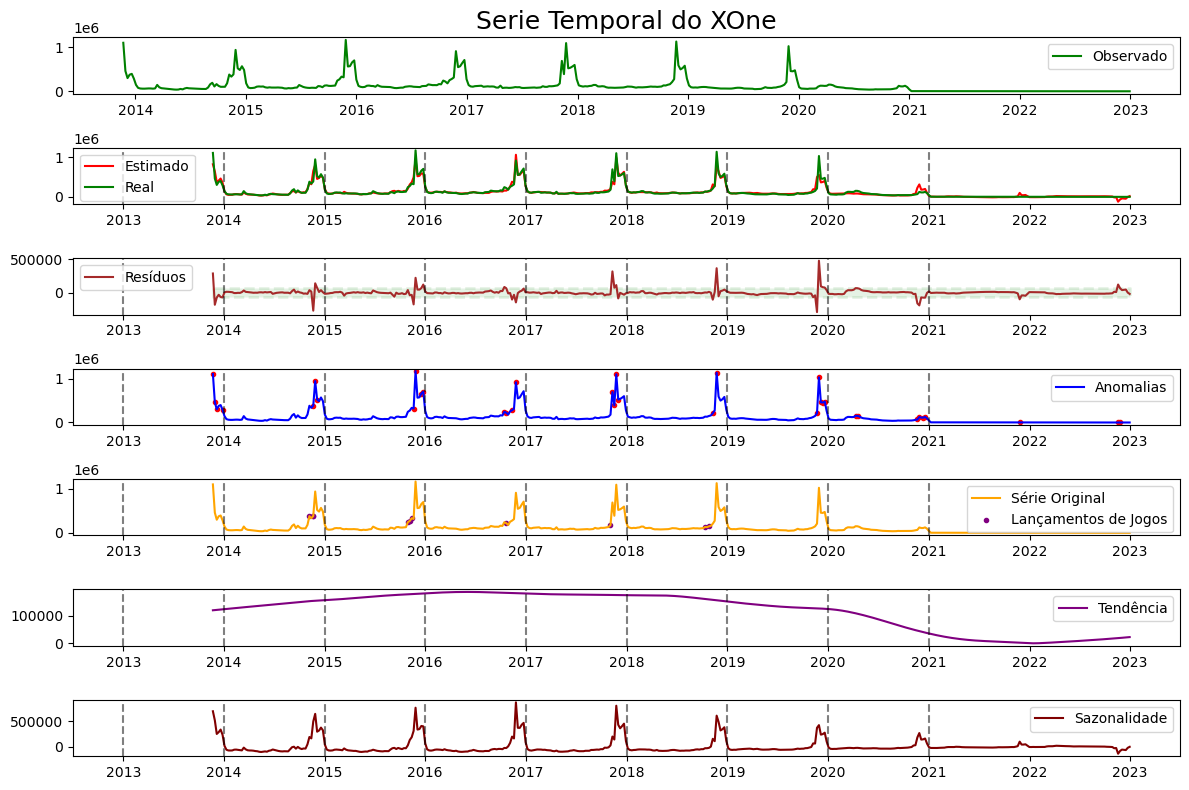

Teste de R2 (Erro quadratico Séries): 0.9438669331182399
Conclusão: Aproximação Boa


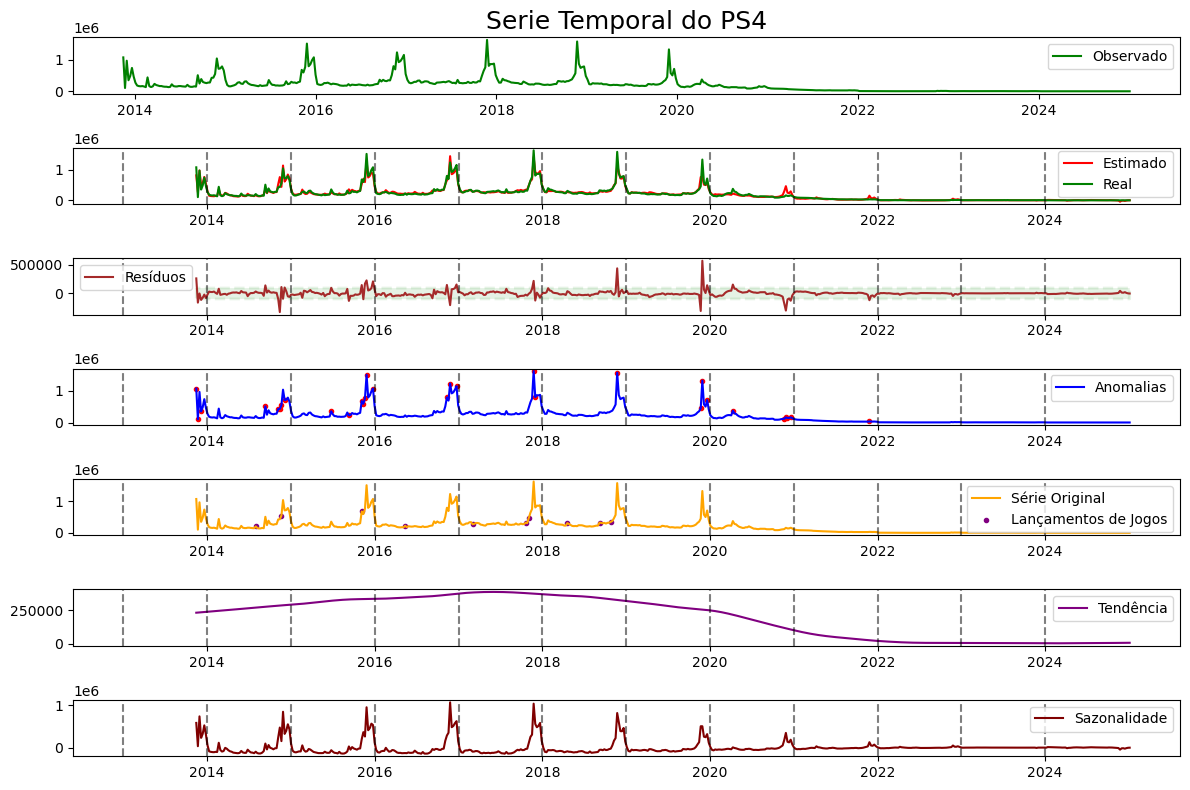

Teste de R2 (Erro quadratico Séries): 0.9630073495126636
Conclusão: Aproximação Boa


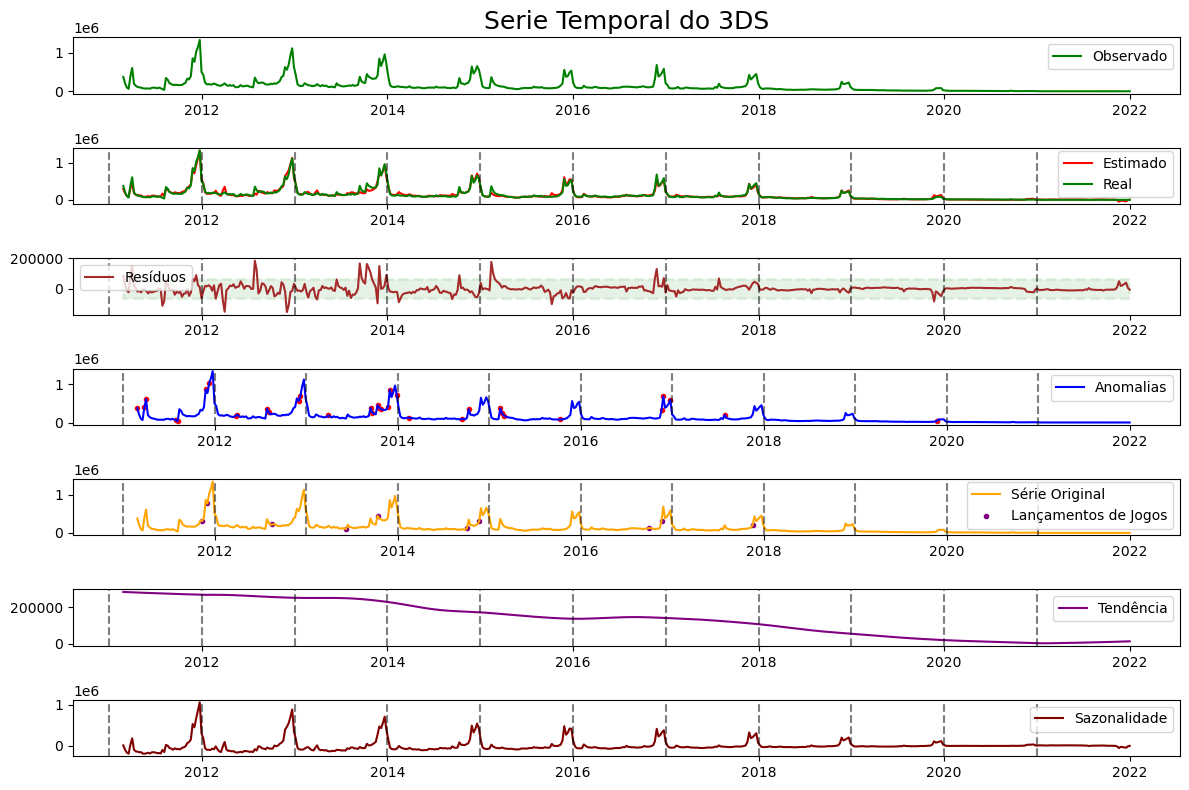

Teste de R2 (Erro quadratico Séries): 0.9591371993325335
Conclusão: Aproximação Boa


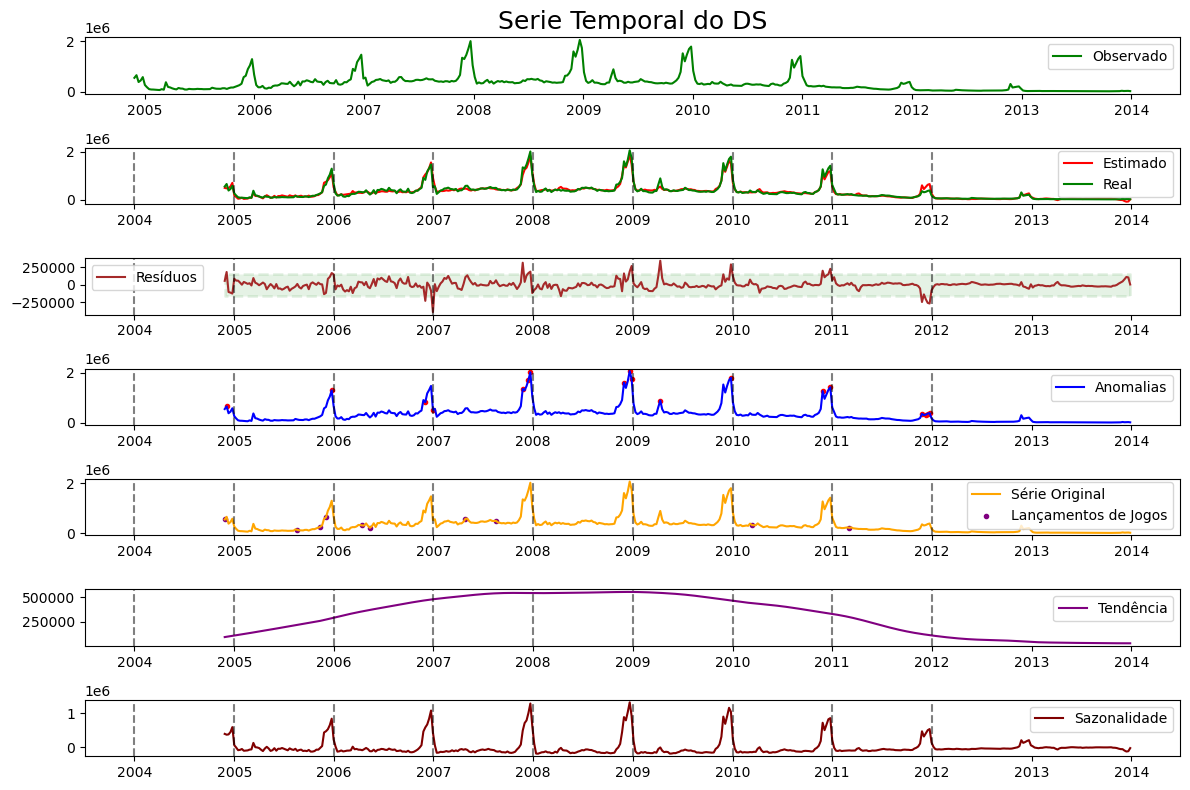

Teste de R2 (Erro quadratico Séries): 0.9495454388132581
Conclusão: Aproximação Boa


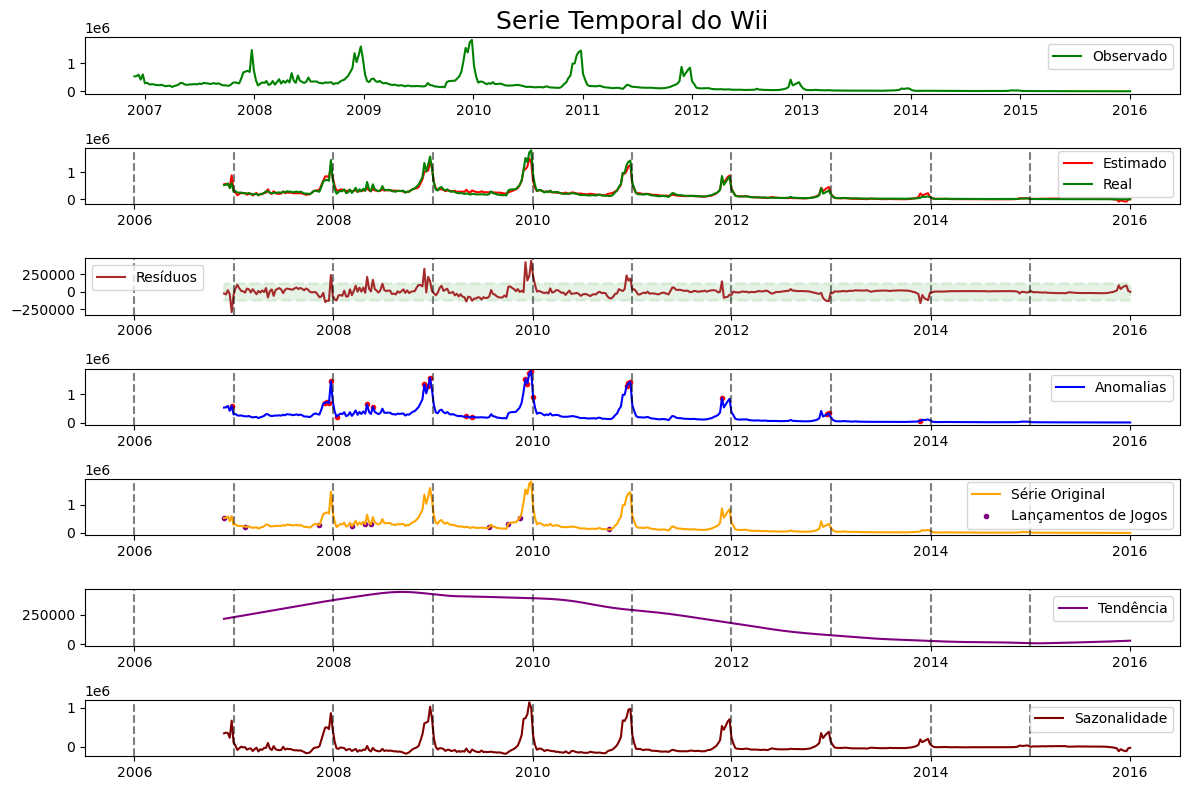

Teste de R2 (Erro quadratico Séries): 0.9479689010716212
Conclusão: Aproximação Boa


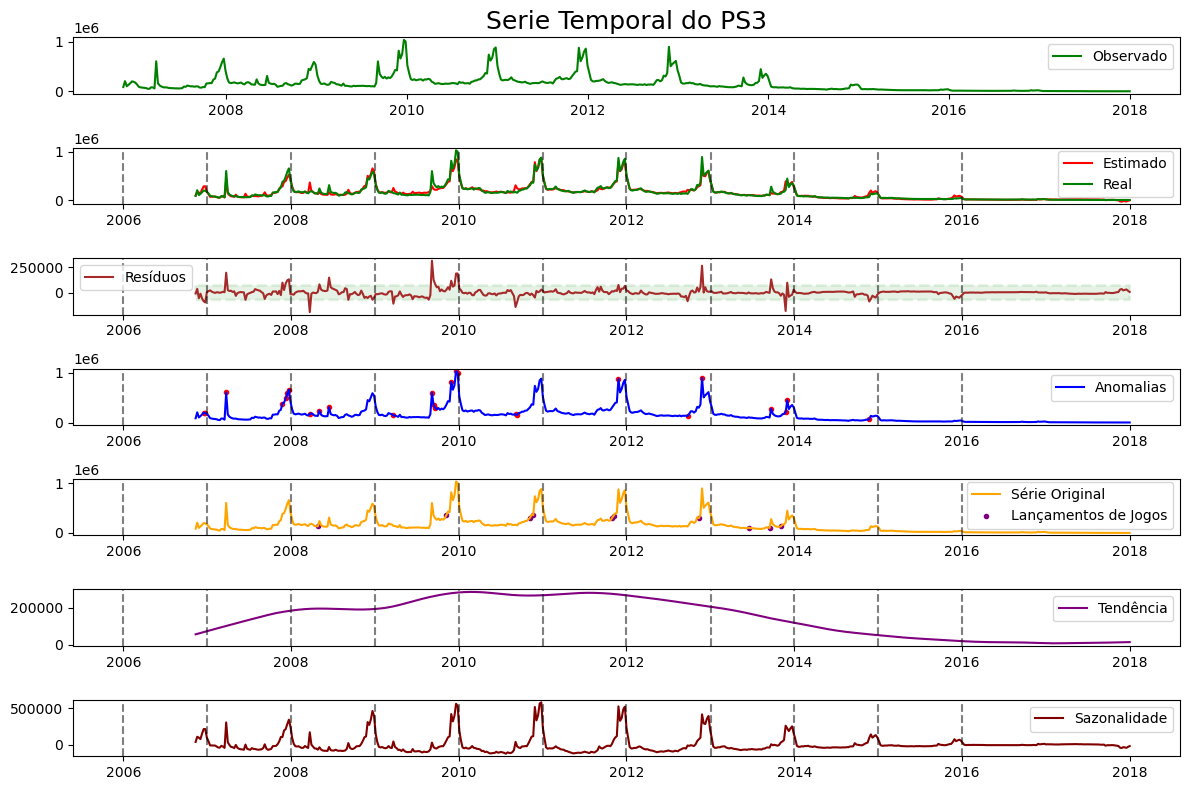

Teste de R2 (Erro quadratico Séries): 0.954073486830889
Conclusão: Aproximação Boa


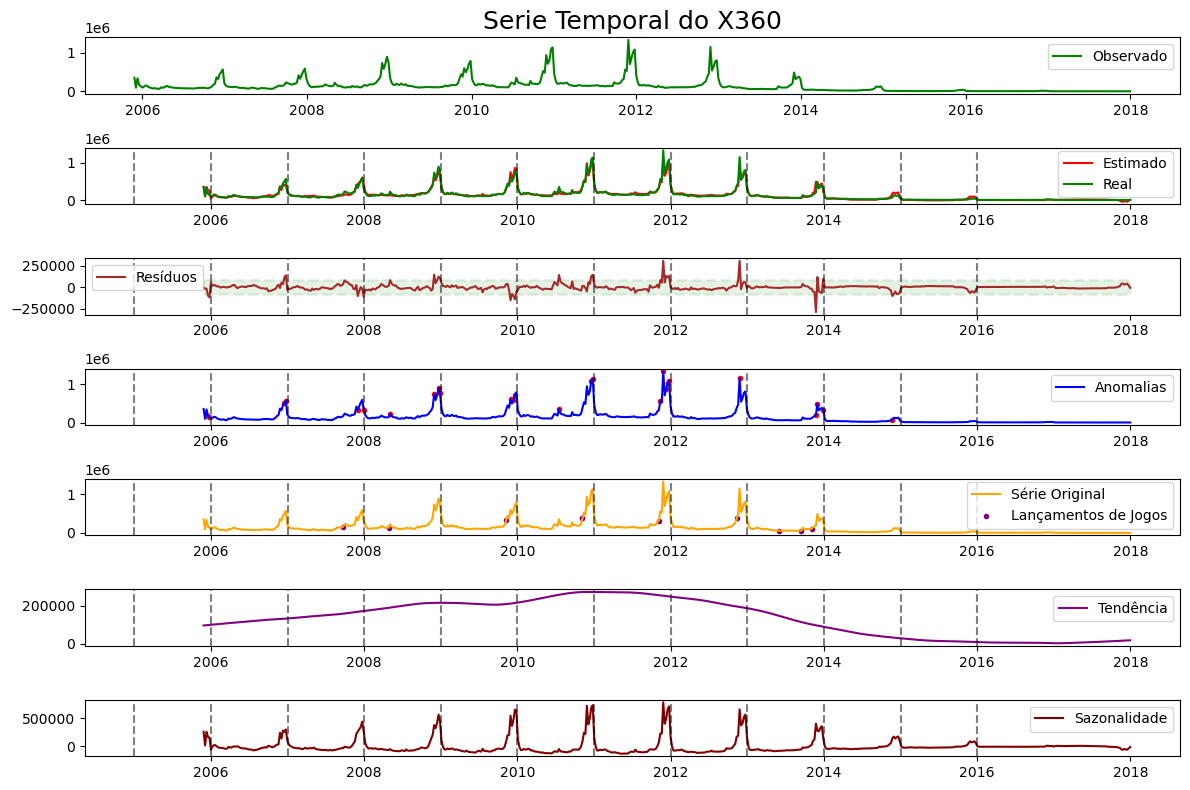

In [57]:
for console in consoles:
    current_series = df[console].dropna()
    current_series = current_series[current_series != 0]
    current_games = df_games[df_games['console'] == console]
    decomposition = STL(current_series, period=52).fit()

    date_min = current_series.index.min().year
    date_max = current_series.index.max().year

    plt.figure(figsize=(12, 8))
    plt.subplot(711)
    plt.title(f'Serie Temporal do {console}', fontsize=18)
    plt.plot(current_series,color='green', label='Observado')
    plt.legend()

    plt.subplot(712)
    ss_res = np.sum(decomposition.resid**2)                
    ss_tot = np.sum((current_series - np.mean(current_series))**2)  
    r2 = 1 - (ss_res / ss_tot)
    
    text_test = (
        f'Teste de R2 (Erro quadratico Séries): {r2}\n'
        f'Conclusão: {"Aproximação Insuficiente" if r2 < 0.8 else "Aproximação Boa"}'
    )
    
    print(text_test)
    estimated = decomposition.trend + decomposition.seasonal
    plt.plot(estimated, color='red', label='Estimado')
    plt.plot(current_series, color='green', label='Real')
    for year in range(date_min,date_max):
        plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    plt.legend()

    plt.subplot(713)
    
    resid = decomposition.resid
    
    factor = 3
    q1 = resid.quantile(.25)
    q3 = resid.quantile(.75)
    iqr = q3 - q1
    
    lower = q1 - (iqr*factor)
    upper = q3 + (iqr*factor)
    plt.plot(resid, color='brown', label='Resíduos')
    plt.fill_between(resid.index,lower, upper, color='g', alpha=0.1, linestyle='--', linewidth=2)
    for year in range(date_min,date_max):
        plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

    plt.legend()
    
    
    plt.subplot(714)
    anomalies = current_series[(resid < lower) | (resid > upper)]
    plt.plot(current_series, color='blue', label='Anomalias')
    for year in range(date_min,date_max):
        plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
        
    plt.scatter(anomalies.index,anomalies, color='r', marker='.')
    plt.legend()
    
    plt.subplot(715)
    plt.plot(current_series, color='orange', label='Série Original') # Plotar a série original como base para os jogos
    for year in range(date_min,date_max):
        plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

    x_plot_games = []
    y_plot_games = []

    for release_date_dt, row in current_games.iterrows():
        game_name = row['name']
        try:
            loc_array = current_series.index.get_indexer([release_date_dt], method='nearest')
            
            if loc_array[0] != -1:
                loc = loc_array[0]
                found_date = current_series.index[loc]
                sales_value = current_series.iloc[loc]

                x_plot_games.append(found_date)
                y_plot_games.append(sales_value)
                
        except Exception:
            pass

    plt.scatter(x_plot_games, y_plot_games, color='purple', marker='.', label='Lançamentos de Jogos')
    plt.legend()
    
    plt.subplot(716)
    plt.plot(decomposition.trend, color='purple', label='Tendência')
    for year in range(date_min,date_max):
        plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    plt.legend()
    
    plt.subplot(717)
    plt.plot(decomposition.seasonal, color='maroon', label='Sazonalidade')
    for year in range(date_min,date_max):
        plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
    plt.legend()
    
    
    plt.tight_layout()
    plt.show()
    

### Próximos Passos
É visível que o modelo de STL parece ser bom para porevisões, e será isso que será feito!